Preparing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/benin-malanville.csv'
df = pd.read_csv(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print(df.describe())


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

Missing Value Report

In [38]:
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
print("Missing values (absolute):\n", missing[missing > 0])
print("Missing values (>5%):\n", missing_pct[missing_pct > 5])

Missing values (absolute):
 Comments    525600
dtype: int64
Missing values (>5%):
 Comments    100.0
dtype: float64


Outlier Detection with Z-Score

In [46]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("Outlier counts:\n", outliers)

Outlier counts:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


Imputing Missing Values and exporting cleaned data

In [53]:

cols_to_impute = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust']
for col in cols_to_impute:
    if col in df.columns and df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

df.to_csv('../data/benin_clean.csv', index=False)

Time Series Visualization

<Figure size 1200x600 with 0 Axes>

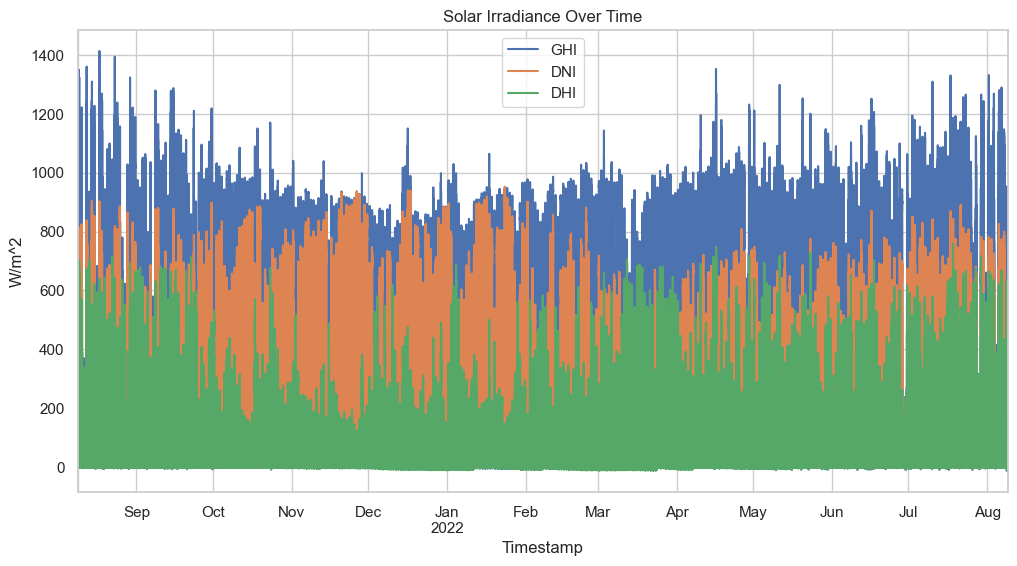

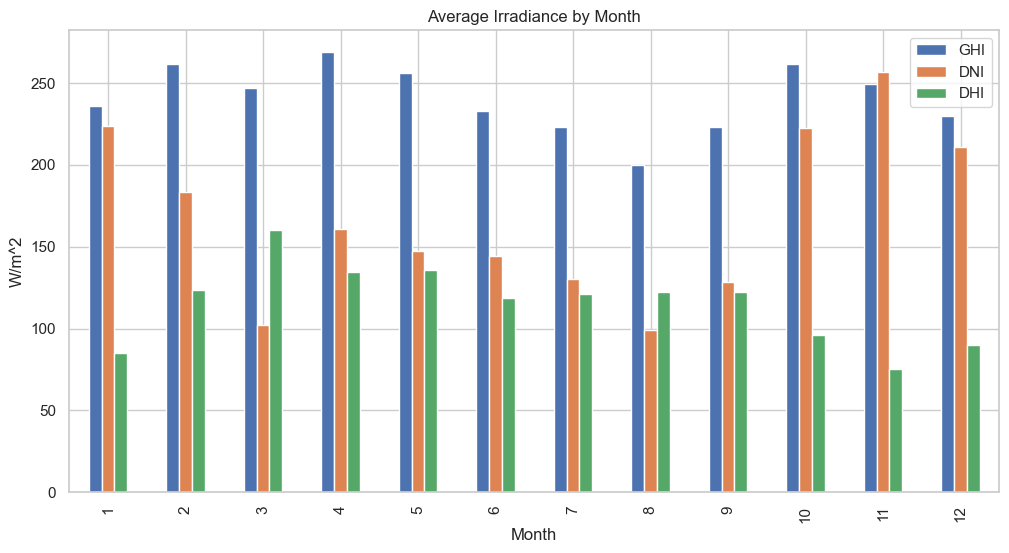

In [59]:

plt.figure()
df.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI'])
plt.title('Solar Irradiance Over Time')
plt.ylabel('W/m^2')
plt.show()

df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', title='Average Irradiance by Month')
plt.ylabel('W/m^2')
plt.show()

Cleaning Impact

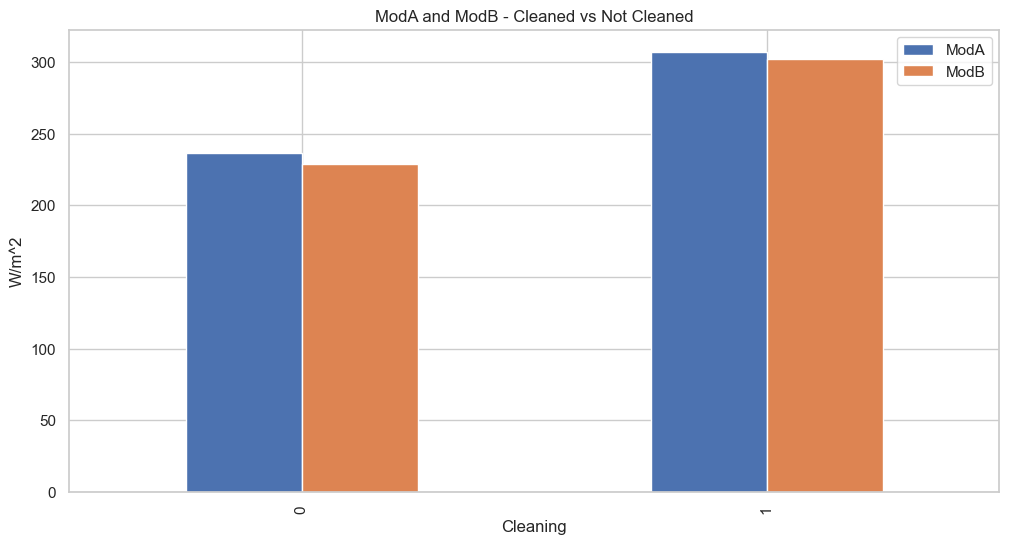

In [64]:

if 'Cleaning' in df.columns:
    cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    cleaning_avg.plot(kind='bar', title='ModA and ModB - Cleaned vs Not Cleaned')
    plt.ylabel('W/m^2')
    plt.show()

Correlation & Relationship Analysis

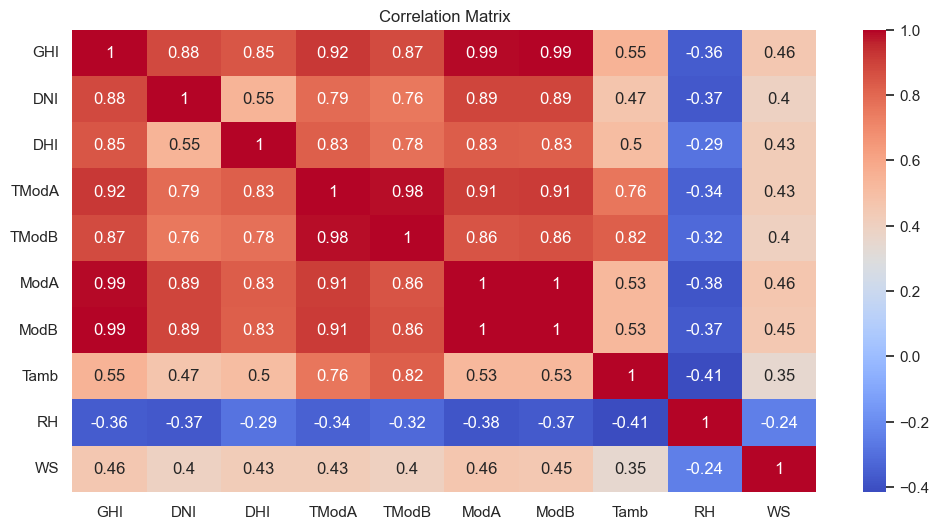

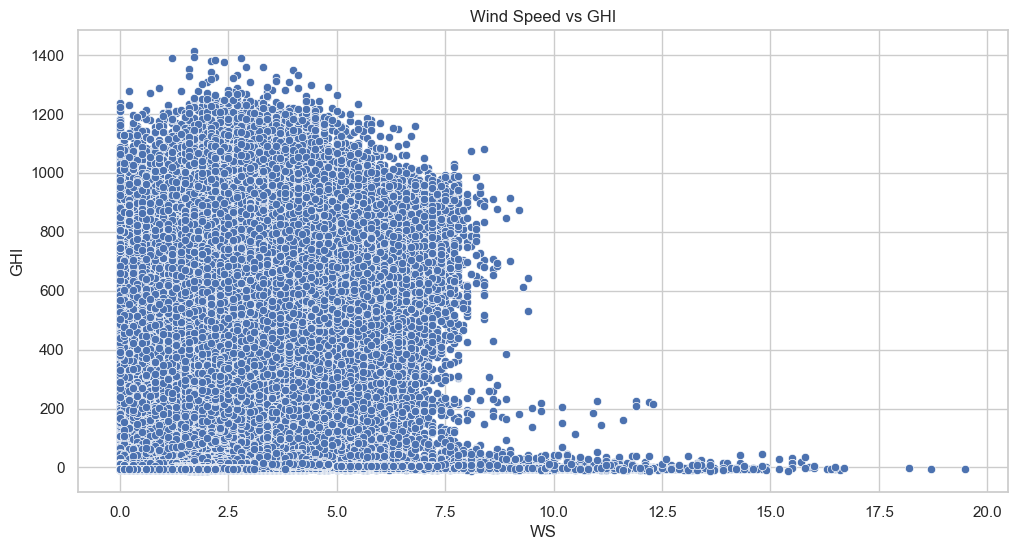

In [68]:

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB', 'Tamb', 'RH', 'WS']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.scatterplot(data=df, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()


Wind & Distribution Analysis (Histogram of GHI and WS)

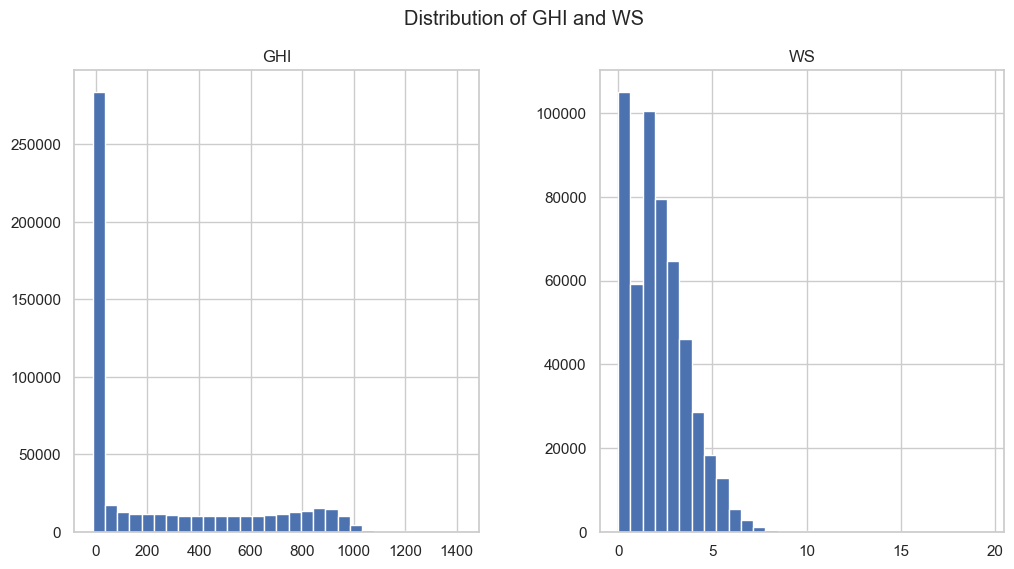

In [71]:

df[['GHI', 'WS']].hist(bins=30)
plt.suptitle('Distribution of GHI and WS')
plt.show()

Bubble Chart

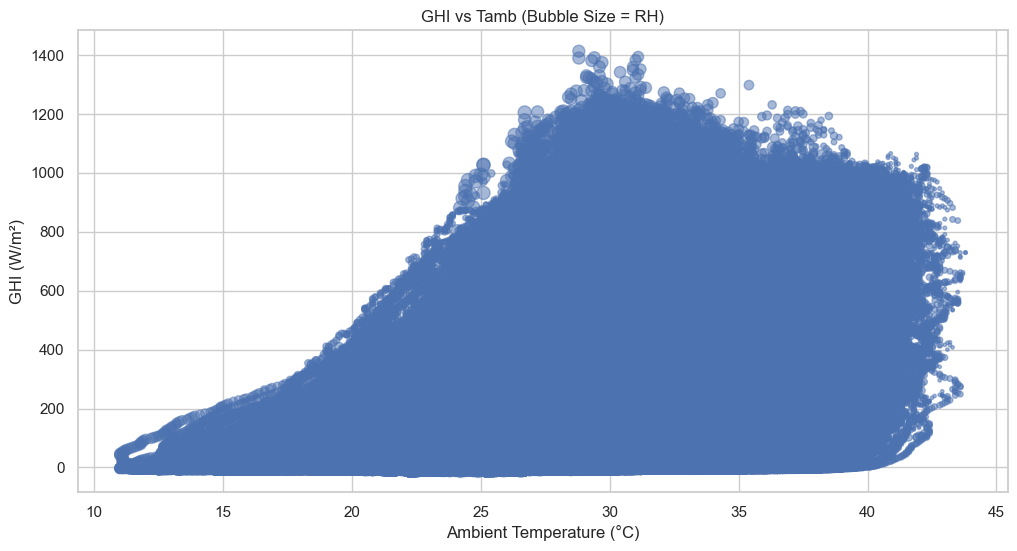

In [73]:

plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.show()